# Вызов необходимых библиотек
[сделано]

In [2]:
from sympy import *
#Здесь возможно стоит импортировать все необходимые функции Sympy по отдельности

In [3]:
#=====Функция для особого вывода внутри Jupyter'a
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sympy.solvers.solveset import *

In [53]:
from sympy.plotting import *

# Задание производственной функции
$$q=x_1^{\alpha_1}x_2^{\alpha_2}e^{x_1\gamma_1+x_2\gamma_1+x_1x_2\gamma_1}$$
[сделано]

In [44]:
q,x1,x2=symbols("q x1 x2")
alpha1,alpha2,gamma1,gamma2,gamma3=symbols("alpha1 alpha2 gamma1 gamma2 gamma3")
y=x1**alpha1*x2**alpha2*E**(gamma1*x1+gamma2*x2+gamma3*x1*x2)
printmd('**Production function:**')
Eq(q,y)

**Production function:**

Eq(q, x1**alpha1*x2**alpha2*exp(gamma1*x1 + gamma2*x2 + gamma3*x1*x2))

# Получение предельной продуктивности
$$MP_{x_i}=\frac{\partial q}{\partial x_i}$$
[сделано]

In [8]:
MPX1,MPX2=symbols("MP_x1 MP_x2")

mpx1=simplify(diff(y,x1))
mpx2=simplify(diff(y,x2))

In [9]:
#=====Выбор экстремума производственной функции
def numpx1(i,j):
    return simplify(mpx1/y).subs(x1,i).subs(x2,j)
def numpx2(i,j):
    return simplify(mpx2/y).subs(x1,i).subs(x2,j)

#====Соркащенная версия
printmd('**Marginal productivity:**')
Matrix([Eq(MPX1,numpx1(x1,x2)*q),Eq(MPX2,numpx2(x1,x2)*q)])

**Marginal productivity:**

Matrix([
[Eq(MP_x1, q*(alpha1/x1 + gamma1 + gamma3*x2))],
[Eq(MP_x2, q*(alpha2/x2 + gamma2 + gamma3*x1))]])

## Примеры использования

In [10]:
#пример
numpx1(50,50)

alpha1/50 + gamma1 + 50*gamma3

# Выбор максимума производственной функции
[сделано]

In [11]:
def numy(i,j):
    return y.subs(x1,i).subs(x2,j)

In [12]:
#пример
Eq(q,numy(50,50))

Eq(q, 50**alpha1*50**alpha2*exp(50*gamma1 + 50*gamma2 + 2500*gamma3))

# Выбор точки единичной эластичности выпуска по фактору
[сделано]

In [13]:
epsilon1,epsilon2=symbols("epsilon_x_1 epsilon_x_2")

In [14]:
e1=simplify(diff(y,x1)/(y/x1))
e2=simplify(diff(y,x2)/(y/x2))

In [15]:
def nume1(i,j):
    return e1.subs(x1,i).subs(x2,j)
    
def nume2(i,j):
    return e2.subs(x1,i).subs(x2,j)

In [16]:
printmd("**Elasticity of production:**")
Matrix([Eq(epsilon1,nume1(x1,x2)),Eq(epsilon2,nume2(x1,x2))])

**Elasticity of production:**

Matrix([
[Eq(epsilon_x_1, alpha1 + gamma1*x1 + gamma3*x1*x2)],
[Eq(epsilon_x_2, alpha2 + gamma2*x2 + gamma3*x1*x2)]])

In [17]:
#пример
nume1(25,25)

alpha1 + 25*gamma1 + 625*gamma3

# Получение параметров производственной функции
[сделано]

In [18]:
#========точка максимума функции (50,50)
#========точка единичной эластичности (25,25)
printmd("**Conditions:**")
Matrix([Eq(numpx1(x1,x2),0),Eq(numpx2(x1,x2),0),Eq(nume1(x1,x2),1),Eq(nume2(x1,x2),1)])

**Conditions:**

Matrix([
[   Eq(alpha1/x1 + gamma1 + gamma3*x2, 0)],
[   Eq(alpha2/x2 + gamma2 + gamma3*x1, 0)],
[Eq(alpha1 + gamma1*x1 + gamma3*x1*x2, 1)],
[Eq(alpha2 + gamma2*x2 + gamma3*x1*x2, 1)]])

In [19]:
#ПРИМЕР НАХОЖДЕНИЯ ПАРАМЕТРОВ ФУНКЦИИ ПО ДАННЫМ УСЛОВИЯМ
parameters=[alpha1,alpha2,gamma1,gamma2,gamma3]

sols1=nonlinsolve([numpx1(30,50),numpx2(30,50),nume1(10,10)-1,nume2(10,10)-1],
            [alpha1,alpha2,gamma1,gamma2,gamma3],S.Reals).args[0]

printmd("**#Example:**")
Matrix([Eq(parameters[i],sols1[i],evaluate=0) for i in range(len(sols1))])

**#Example:**

Matrix([
[ Eq(alpha1, 600*gamma3 + 3/2)],
[ Eq(alpha2, 250*gamma3 + 5/4)],
[Eq(gamma1, -70*gamma3 - 1/20)],
[Eq(gamma2, -35*gamma3 - 1/40)],
[           Eq(gamma3, gamma3)]])

In [20]:
#===ПОДСТАНОВКА ПОЛУЧЕННЫХ ПАРАМЕТРОВ
sols2=nonlinsolve([numpx1(50,50),numpx2(50,50),nume1(25,25)-1,nume2(25,25)-1],
                      [alpha1,alpha2,gamma1,gamma2,gamma3]).subs(gamma3,-0.0002)

galpha1,galpha2,ggamma1,ggamma2,ggamma3=[sols2.args[0][i].evalf(5) for i in range(5)]

In [21]:
gpars=[galpha1,galpha2,ggamma1,ggamma2,ggamma3]
gpars

[1.7500, 1.7500, -0.025000, -0.025000, -0.00020000]

In [22]:
#===ПРИМЕР ПРОИЗВОДСТВЕННОЙ ФУНКЦИИ, УДОВЛЕТВОРЯЮЩЕЙ ДАННЫМ УСЛОВИЯМ
example_y=y.subs(alpha1,galpha1).subs(alpha2,galpha2).subs(gamma1,ggamma1).subs(gamma2,ggamma2).subs(gamma3,ggamma3)
example_y

x1**1.75*x2**1.75*exp(-0.0002*x1*x2 - 0.025*x1 - 0.025*x2)

# Графики
[сделано]

In [23]:
example_y

x1**1.75*x2**1.75*exp(-0.0002*x1*x2 - 0.025*x1 - 0.025*x2)

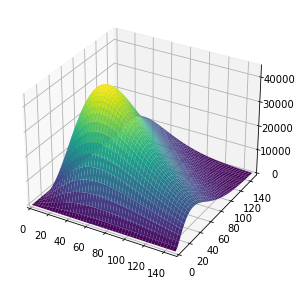

In [24]:
%matplotlib inline
plot3d(example_y,(x1,0,150),(x2,0,150))

In [25]:
lambd_example_y=lambdify([x1,x2],example_y)

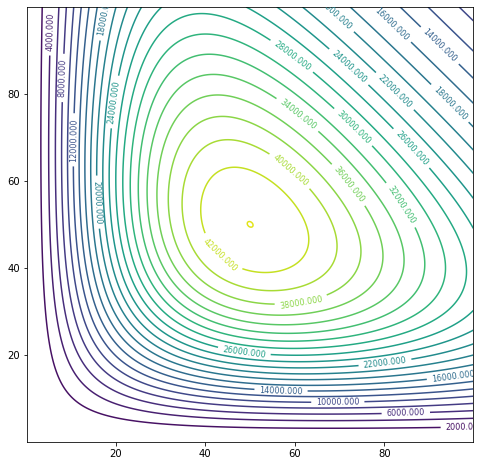

In [26]:
%matplotlib inline
xline = np.arange(0.1, 100, 0.1)
yline = np.arange(0.1, 100, 0.1)
xxline, yyline = np.meshgrid(xline, yline)
zline = lambd_example_y(xxline,yyline)
fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(xline,yline,zline,np.arange(0, 48000, 2000))
ax.clabel(CS, inline=True, fontsize=8)
plt.show()

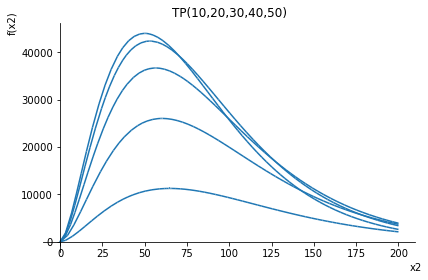

In [27]:
%matplotlib inline
plot(example_y.subs(x1,50),
     example_y.subs(x1,40),
     example_y.subs(x1,30),
     example_y.subs(x1,20),
     example_y.subs(x1,10),
     (x2,0,200),title='TP(10,20,30,40,50)')

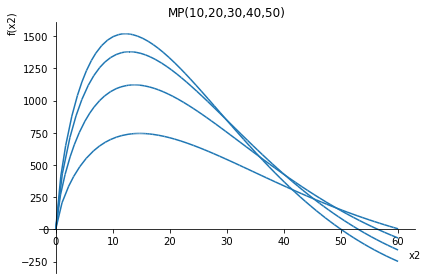

In [28]:
%matplotlib inline
plot(diff(example_y.subs(x1,50),x2),
     diff(example_y.subs(x1,40),x2),
     diff(example_y.subs(x1,30),x2),
     diff(example_y.subs(x1,20),x2),
     (x2,0,60),title="MP(10,20,30,40,50)")

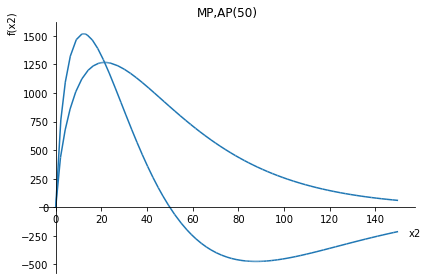

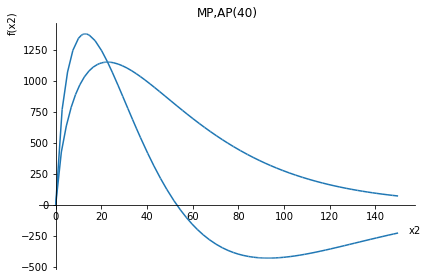

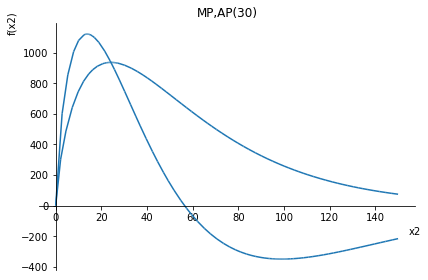

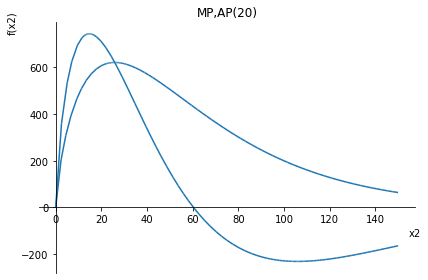

In [29]:
%matplotlib inline
plot(example_y.subs(x1,50)/x2,diff(example_y.subs(x1,50),x2),(x2,0,150),title='MP,AP(50)')
plot(example_y.subs(x1,40)/x2,diff(example_y.subs(x1,40),x2),(x2,0,150),title='MP,AP(40)')
plot(example_y.subs(x1,30)/x2,diff(example_y.subs(x1,30),x2),(x2,0,150),title='MP,AP(30)')
plot(example_y.subs(x1,20)/x2,diff(example_y.subs(x1,20),x2),(x2,0,150),title='MP,AP(20)')


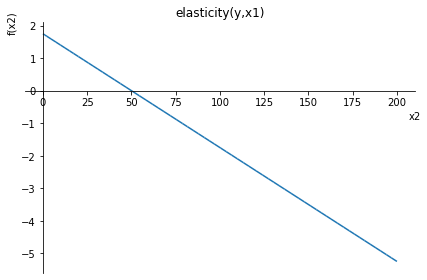

In [30]:
e_plot=(diff(example_y.subs(x1,50),x2)/(example_y.subs(x1,50)/x2))
plot(e_plot,(x2,0,200),title="elasticity(y,x1)")

# Функция для получения параметров производственной функции
[сделано]

In [31]:
[alpha1, alpha2, gamma1, gamma2, gamma3]

[alpha1, alpha2, gamma1, gamma2, gamma3]

In [32]:
#====ycheck - функция, принимающая гамма3 и опрделяющая прочие параметры пр. функции
def ycheck(gamma3sub):
    resh1=nonlinsolve([numpx1(25,50),numpx2(25,50),nume1(12,25)-1,nume2(12,25)-1],
                       [alpha1, alpha2, gamma1, gamma2, gamma3]).args[0].subs(gamma3,gamma3sub)
    d=y.subs(alpha1,resh1[0]).subs(alpha2,resh1[1]).subs(gamma1,resh1[2]).subs(gamma2,resh1[3]).subs(gamma3,resh1[4])
    return d

In [33]:
#======(i,j)-(x1,x2) в точке максимума функции, (k,l) -(x1,x2) при котором эластичность равна 1 
#======p - значение гамма3
#======params=1 - доп. аргумент, который при значении True выводит лист значений параметров
def ycheck_all(x1max,x2max,x1e1,x2e2,gamma3_zamena,get_parameters=False):
    resh2=nonlinsolve([numpx1(x1max,x2max),numpx2(x1max,x2max),
                       nume1(x1e1,x2e2)-1,nume2(x1e1,x2e2)-1],
                       [alpha1,alpha2,gamma1,gamma2,gamma3]).args[0].subs(gamma3,gamma3_zamena)
    if get_parameters==False:
        d1=y.subs(alpha1,resh2[0]).subs(alpha2,resh2[1]).subs(gamma1,resh2[2]).subs(gamma2,resh2[3]).subs(gamma3,resh2[4])
        return d1
    else:
        d2=[resh2[i] for i in range(5)]
        return d2

In [34]:
#пример функции
ycheck_all(30,20,10,10,-0.0001)

x1**1.485*x2**1.96*exp(-0.0001*x1*x2 - 0.0475*x1 - 0.095*x2)

In [35]:
#пример параметров
Matrix(ycheck_all(30,50,20,30,-0.0001,1))

Matrix([
[   2.88],
[  2.425],
[ -0.091],
[-0.0455],
[-0.0001]])

# Генератор графиков для подбора параметров
[сделано]

In [36]:
def all_plots(gr):
    plot3d(gr, (x1,0,100),(x2,0,100))
    %matplotlib inline
    
    
    XX=[x1,x2]
    for j in range(2):
        vr1=plot(gr.subs(XX[j],10),(XX[j-1],0,100),ylabel=f"TP({XX[j-1]})",
             title=f"Функция выпуска от {XX[j-1]}(10,20,30,40,50)",show=0)
        for i in range(20,60,10):
            pp=plot(gr.subs(XX[j],i),(XX[j-1],0,100),show=0)
            vr1.append(pp[0])
        vr1.show()
        vr2=plot(diff(gr.subs(XX[j],10),XX[j-1]),(XX[j-1],0,100),
                 title=f"MP,AP от {XX[j-1]}(10,20,30,40,50)",
                 ylabel=f"MP,AP({XX[j-1]})",show=0)
        vr3=plot(gr.subs(XX[j],10)/XX[j-1],(XX[j-1],0,100),line_color="red",show=0)
        vr2.append(vr3[0])
        for i in range(20,60,10):
            pp1=plot(diff(gr.subs(XX[j],i),XX[j-1]),(XX[j-1],0,100),show=0)
            pp2=plot(gr.subs(XX[j],i)/XX[j-1],(XX[j-1],0,100),line_color="red",show=0)
            vr2.append(pp1[0])
            vr2.append(pp2[0])
        vr2.show()

In [37]:
ycheck_all(30,50,10,30,-0.0001)

x1**1.47*x2**2.35*exp(-0.0001*x1*x2 - 0.044*x1 - 0.044*x2)

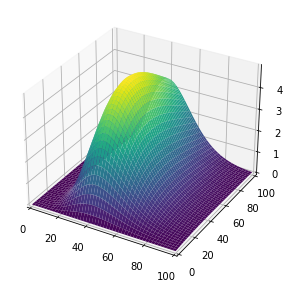

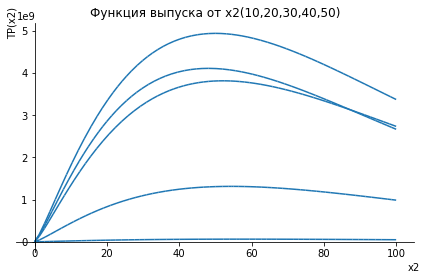

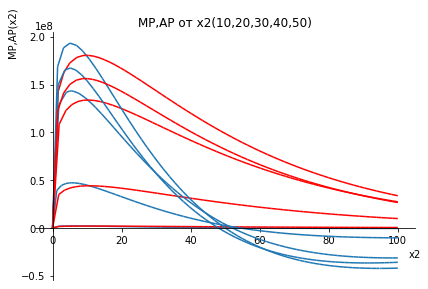

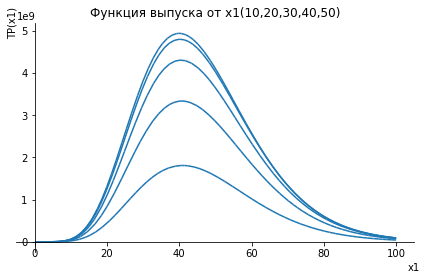

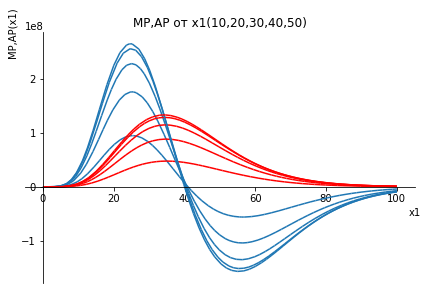

In [38]:
#===пример использования
all_plots(ycheck_all(40,50,35,10,-0.0001))

# Генерация линий уровня
[сделано]

In [362]:
#Определяем класс, который заставляет класс выглядеть определенным образом
#Этот убирает 000 в конце

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

In [387]:
#====функция для получения линий уровня от производственной функции
#====gr - функция для построения линий уровня
#====доп. аргумент: x1maxx,x2maxx - значения максимумов от которых зависит пик функции
#====доп. аргумент: i, j - края графика x1 и x2
#====доп. аргумент: numlevels - число уровней
def level_lines(gr,x1maxx=30,x2maxx=50,i=100,j=100,numlevels=30):
    vr1=lambdify([x1,x2],gr)
    xl = np.arange(0.1, i, 0.1)
    yl = np.arange(0.1, j, 0.1)
    xxl, yyl = np.meshgrid(xl, yl)
    zl = vr1(xxl,yyl)
    fig, ax = plt.subplots(figsize=(8,8))
    plt.xlabel('x1',fontsize=14, fontweight='bold')
    plt.ylabel('x2',fontsize=14, fontweight='bold')
    plt.grid()
    
    if (x1maxx==30) and (x2maxx==50):
        CS = ax.contour(xl,yl,zl,np.arange(0, 38000, 2000))
    else:
        vr2=vr1(x1maxx,x2maxx)
        CS = ax.contour(xl,yl,zl,np.arange(0, int(vr2+vr2/numlevels), int(vr2/numlevels)))
    
    CS.levels = [nf(val) for val in CS.levels]
    
    if plt.rcParams["text.usetex"]:
        fmt = r'%r'
    else:
        fmt = '%r'

    ax.clabel(CS, CS.levels,inline=True, fmt=fmt, fontsize=10)
    return [ax,fig]
#ФУНКЦИЯ ВОХВРАЩАЕТ АКСИС И ФИГУРУ, ПОЭТОМУ
#МОЖНО АППЕНД ОТДЕЛЬНЫЙ САБПЛОТ
#А ТАКЖЕ ДОБАВИТЬ НОВЫЙ ГРАФИК НА СУЩЕСТВУЮЩИЙ методом [0].plot()

x1**2.1*x2**1.7*exp(-0.0005*x1*x2 - 0.04*x1 - 0.0133333333333333*x2)

[<AxesSubplot:xlabel='x1', ylabel='x2'>, <Figure size 576x576 with 1 Axes>]

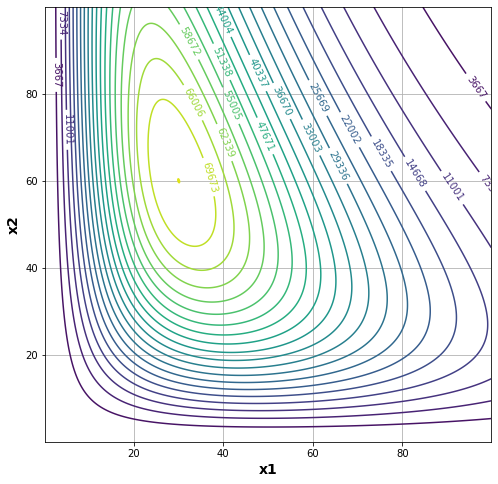

In [389]:
#пример
display(ycheck_all(30,60,20,30,-0.0005))
level_lines(ycheck_all(30,60,20,30,-0.0005),30,60,numlevels=20)

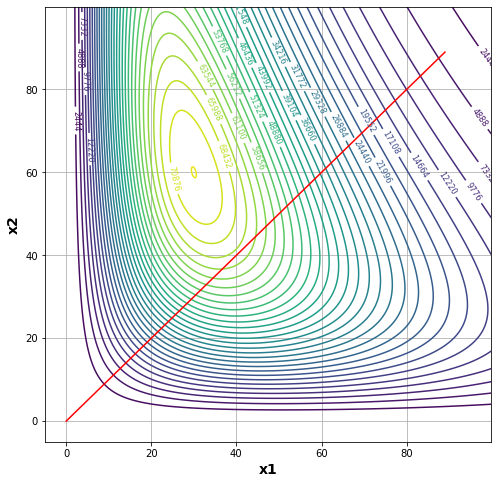

In [368]:
#добавление нового графика поверх существующего
level_lines(ycheck_all(30,60,20,30,-0.0005),30,60)[0].plot(range(90),range(90),'r')

# Подбор подходящей функции

[<AxesSubplot:xlabel='x1', ylabel='x2'>, <Figure size 576x576 with 1 Axes>]

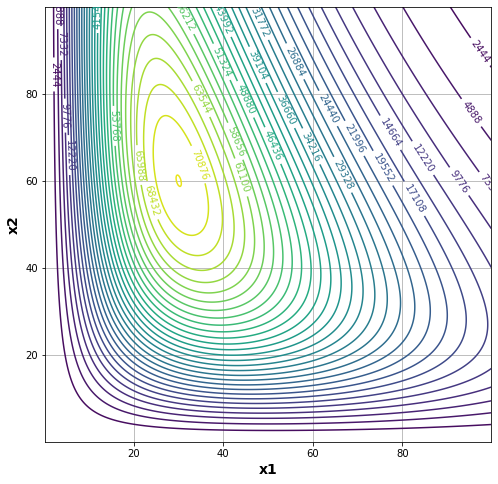

In [381]:
level_lines(ycheck_all(30,60,20,30,-0.0005),30,60)

[<AxesSubplot:xlabel='x1', ylabel='x2'>, <Figure size 576x576 with 1 Axes>]

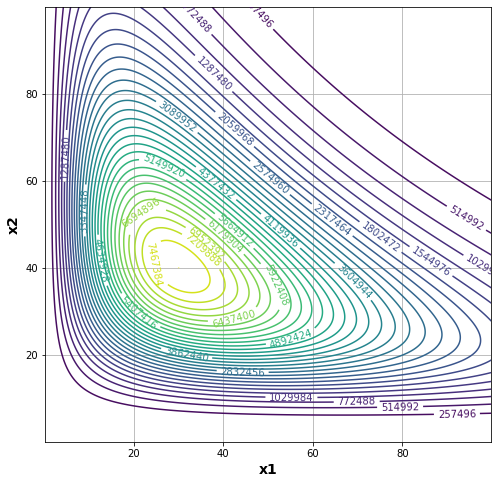

In [382]:
level_lines(ycheck_all(30,40,15,35,-0.001),30,40)

[<AxesSubplot:xlabel='x1', ylabel='x2'>, <Figure size 576x576 with 1 Axes>]

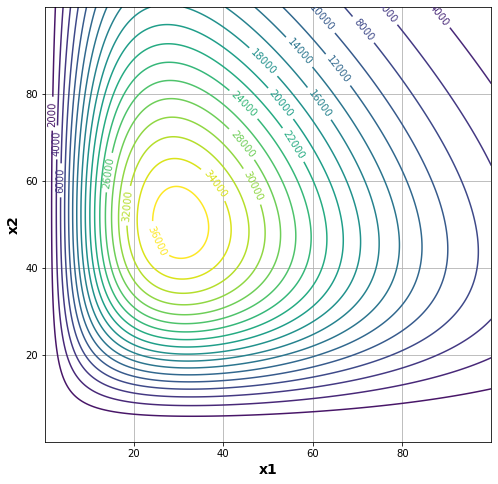

In [383]:
level_lines(ycheck_all(30,50,10,30,-0.0001))

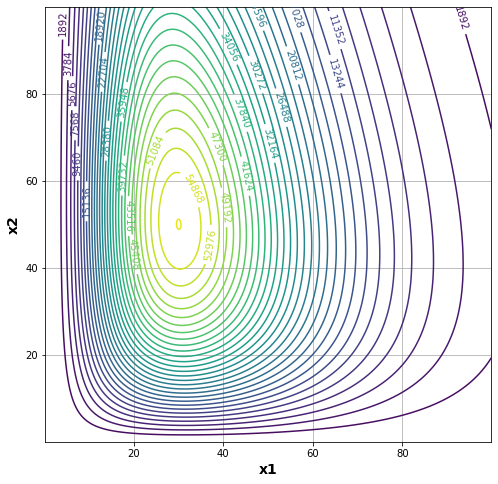

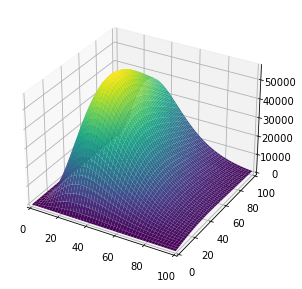

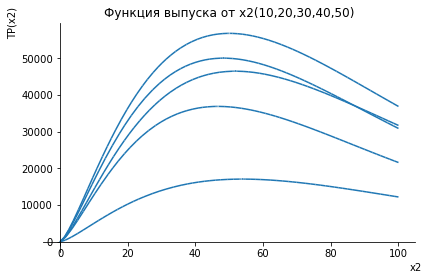

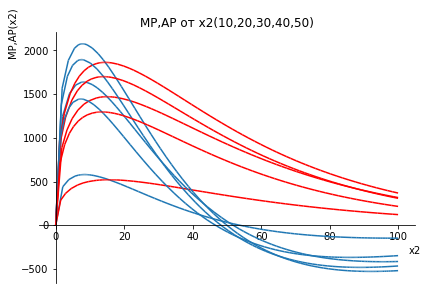

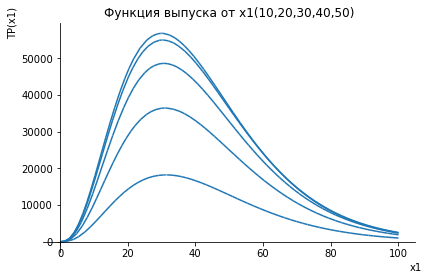

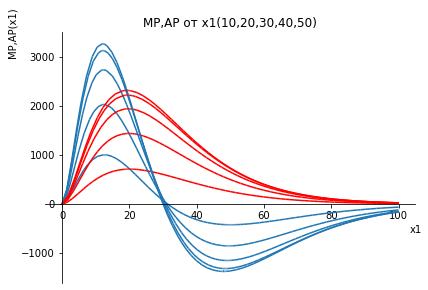

In [384]:
level_lines(ycheck_all(30,50,20,15,-0.0001),30.001,50.001)
all_plots(ycheck_all(30,50,20,15,-0.0001))

# Получение линии оптимальных факторов 
# $x^*_2=f(x^*_1)$

In [58]:
#rho-соотношение wен факторов
Rho,p1,p2=symbols('Rho p_1 p_2')
Eq(rho,p1/p2)

Eq(rho, p_1/p_2)

In [59]:
#===пр. функция, к которой будет выведена линия оптимумов
yex2=ycheck_all(30,50,20,35,-0.0001)
yex2

x1**2.91*x2**3.21666666666667*exp(-0.0001*x1*x2 - 0.092*x1 - 0.0613333333333333*x2)

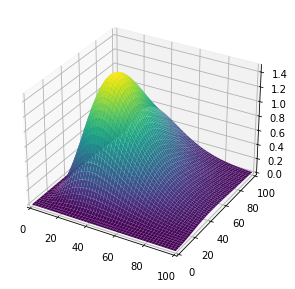

In [55]:
plot3d(yex2,(x1,0,100),(x2,0,100))

[<AxesSubplot:xlabel='x1', ylabel='x2'>, <Figure size 576x576 with 1 Axes>]

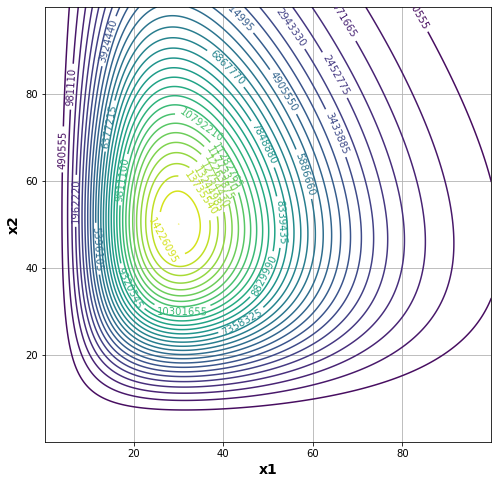

In [385]:
level_lines(yex2,30.001,50.001)

In [103]:
#функция предельного тезничего замещения равная соотношению цен факторов
def mrts1(gr,rhosub=1):
    return simplify((diff(gr,x1)-diff(gr,x2)*rhosub)/gr,rational=None)

Eq(mrts1(y),0)

Eq(alpha1/x1 - alpha2/x2 + gamma1 - gamma2 - gamma3*x1 + gamma3*x2, 0)

In [77]:
printmd('**MRTSx1x2:**')
mrts1(yex2)

**MRTSx1x2:**

0.0001*x1 - 0.0001*x2 - 0.0306666666666667 - 3.21666666666667/x2 + 2.91/x1

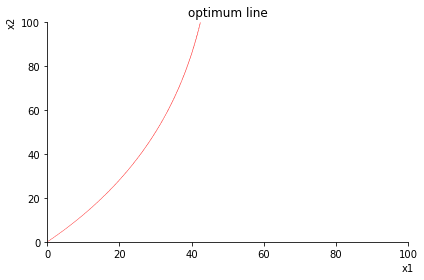

In [151]:
#имплицитный график (график неявно заданной функции)
#проблема с ним, что он задается не поточечно, а поинтервально
#то есть не получится извлечь точки объекта plot_implicit
%matplotlib inline
plot_implicit(mrts1(yex2),(x1,0,100),(x2,0,100),line_color='red',title="optimum line")

## Проблемы с аналитическим выводом

In [150]:
#===Другое представление MRTS
def mrts2(gr,rhosub=1):
    return simplify((x2*x1*diff(gr,x1)-x1*x2*diff(gr,x2)*rhosub)/gr,rational=None)

Eq(mrts2(y),0)

Eq(alpha1*x2 - alpha2*x1 + gamma1*x1*x2 - gamma2*x1*x2 - gamma3*x1**2*x2 + gamma3*x1*x2**2, 0)

In [108]:
#==Становится понятно, какие проблемы могут возникнуть
#==при аналитическом выводе линии оптимумов
#==дискриминант мб <0
#==отчего оптимумы становятся комплексными
Matrix([Eq(collect(mrts3(y),x1),0),Eq(collect(mrts3(y),x2),0)])

Matrix([
[Eq(alpha1*x2 - gamma3*x1**2*x2 + x1*(-alpha2 + gamma1*x2 - gamma2*x2 + gamma3*x2**2), 0)],
[Eq(-alpha2*x1 + gamma3*x1*x2**2 + x2*(alpha1 + gamma1*x1 - gamma2*x1 - gamma3*x1**2), 0)]])

In [123]:
#дискриминант который может обращаться в (-)
#само же уравнение является многочленом наивысшей степени (4) все еще решаемым аналитически
korni=solve(mrts3(y),x1)
simplify(korni[1]-korni[0])
discr=simplify((korni[1]-korni[0])*gamma3*x2)**2
discr

4*alpha1*gamma3*x2**2 + alpha2**2 - 2*alpha2*gamma1*x2 + 2*alpha2*gamma2*x2 - 2*alpha2*gamma3*x2**2 + gamma1**2*x2**2 - 2*gamma1*gamma2*x2**2 + 2*gamma1*gamma3*x2**3 + gamma2**2*x2**2 - 2*gamma2*gamma3*x2**3 + gamma3**2*x2**4

In [137]:
#==здесь я улучшаб допущения насчет x1, x2,
#==чтобы получить, не уходящую в комплексные линию оптимумов
x11,x22=symbols('x_11 x_22',positive=1,real=1)
x22

x_22

In [134]:
discr1=discr.subs(x2,x22)

In [135]:
#дискриминант все равно получается невероятно сложным
solve(discr1,x22)

[Piecewise((-sqrt(-2*((alpha2**2/gamma3**2 - (2*gamma1 - 2*gamma2)*((2*gamma1 - 2*gamma2)*(3*(2*gamma1 - 2*gamma2)**2/(256*gamma3**2) - (4*alpha1*gamma3 - 2*alpha2*gamma3 + gamma1**2 - 2*gamma1*gamma2 + gamma2**2)/(16*gamma3**2))/gamma3 + (-2*alpha2*gamma1 + 2*alpha2*gamma2)/(4*gamma3**2))/gamma3)*(-3*(2*gamma1 - 2*gamma2)**2/(8*gamma3**2) + (4*alpha1*gamma3 - 2*alpha2*gamma3 + gamma1**2 - 2*gamma1*gamma2 + gamma2**2)/gamma3**2)/3 - (-3*(2*gamma1 - 2*gamma2)**2/(8*gamma3**2) + (4*alpha1*gamma3 - 2*alpha2*gamma3 + gamma1**2 - 2*gamma1*gamma2 + gamma2**2)/gamma3**2)**3/108 - ((2*gamma1 - 2*gamma2)*((2*gamma1 - 2*gamma2)**2/(8*gamma3**2) - (4*alpha1*gamma3 - 2*alpha2*gamma3 + gamma1**2 - 2*gamma1*gamma2 + gamma2**2)/(2*gamma3**2))/gamma3 + (-2*alpha2*gamma1 + 2*alpha2*gamma2)/gamma3**2)**2/8)**(1/3) + (2*gamma1 - 2*gamma2)**2/(4*gamma3**2) - 2*(4*alpha1*gamma3 - 2*alpha2*gamma3 + gamma1**2 - 2*gamma1*gamma2 + gamma2**2)/(3*gamma3**2))/2 - sqrt((2*(2*gamma1 - 2*gamma2)*((2*gamma1 - 2*gamma

## Аналитический вывод для примера

In [152]:
yex2

x1**2.91*x2**3.21666666666667*exp(-0.0001*x1*x2 - 0.092*x1 - 0.0613333333333333*x2)

In [155]:
mrts1(yex2)

0.0001*x1**2*x2 - 0.0001*x1*x2**2 - 0.0306666666666667*x1*x2 - 3.21666666666667*x1 + 2.91*x2

In [161]:
optx2=solve(mrts1(yex2),x2)

In [167]:
optx2[0]

0.166666666666667*(3.0*x1**2 - 920.0*x1 - 87300.0*sqrt(1.18090244564896e-9*x1**4 - 7.24286833331365e-7*x1**3 + 2.78430554407456e-5*x1**2 - 0.0210767468499427*x1 + 1) + 87300.0)/x1

In [169]:
#проверяем линию на вещественность, т.е. D>0
#Получаем промежуток, в котором линия оптимумов x2 от x1 будет вещественной 
solve((simplify(optx2[0]-optx2[1])*x1)**2>0,x1)

((-oo < x1) & (x1 < 47.0642437213004)) | ((618.303784340422 < x1) & (x1 < oo))

In [278]:
optx1=solve(mrts1(yex2),x1)
optx1[0]

0.166666666666667*(3.0*x2**2 + 920.0*x2 - 96500.0*sqrt(9.66468898493919e-10*x2**4 + 5.9276759107627e-7*x2**3 + 4.05702166501114e-5*x2**2 + 0.0190673575129534*x2 + 1) + 96500.0)/x2

In [202]:
#===т.к. x1 всегда больше нуля, то получаем полностью вещественную линию уровня
solve((simplify(optx1[0]-optx1[1])*x2)**2>0,x2)&(x1>0)

(x1 > 0) & (((-oo < x2) & (x2 < -593.657201755518)) | ((-54.1839070957884 < x2) & (x2 < oo)))

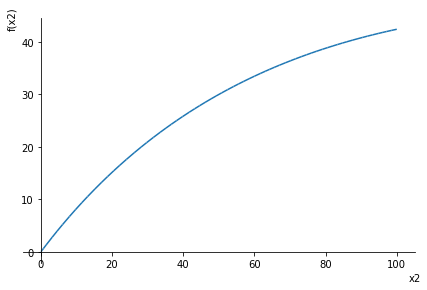

In [208]:
leveplot(optx1[0],(x2,0,100))

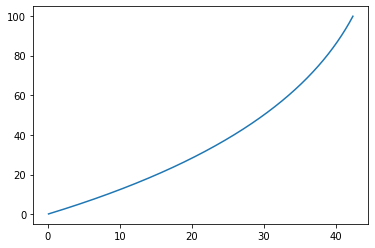

In [285]:
lambd_optx1=lambdify([x2],optx1[0])
xxx1=np.arange(0.1,100,0.1)
xxx2=lambd_optx1(xxx1)
plt.plot(xxx2,xxx1)

In [ ]:
#далее необходимо совместить линию оптимумом и линии уровня на одном графике

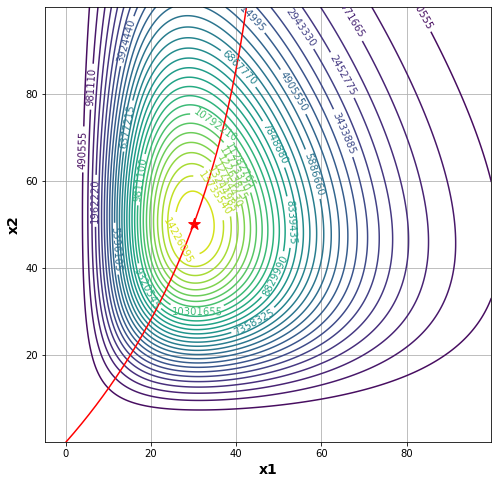

In [386]:
zxc,vbn=level_lines(yex2,30.001,50.001)
zxc.plot(xxx2,xxx1,'r')
# [0]
# 
zxc.scatter(30,50,c='r',s=150,marker="*")

## Не законченное

In [ ]:
blya0=solve(mrts1(ycheck_all(30,50,10,30,-0.0001)),x2)[0]
blya0

In [ ]:
solve(mrts1(ycheck_all(30,50,10,30,-0.0001)),x2,S.Reals)

In [ ]:
solveset(mrts1(ycheck_all(30,50,10,30,-0.0001)),x2,S.Reals)

In [ ]:
cvb1=ycheck_all(30,50,10,30,-0.0001,1)

In [ ]:
tyuiop=(alpha1+x1*(gamma1-gamma2-gamma3*x1)**2+4*alpha2*gamma3*x1**2).subs(alpha1,cvb1[0]).subs(alpha2,cvb1[1]).subs(gamma1,cvb1[2]).subs(gamma2,cvb1[3]).subs(gamma3,cvb1[4])
solve(simplify(tyuiop,force=1,deep=1,evaluate=1,rational=1),x1)[0]

In [144]:
ygv=(ycheck_all(30,50,10,30,-0.0001).subs(x1,x11).subs(x2,x22))

In [149]:
solve(mrts2(ygv),x2)

[]

In [ ]:
asd1=[blyax1[0].subs(x2,i) for i in range(1,300)]
# [blyax1[1].subs(x2,i) for i in range(0,100)]

In [ ]:
plt.plot(asd1[:100],range(1,101))

In [ ]:
blyax1[0].subs(x2,20)

In [ ]:
simplify((simplify(blyax1[1]-blyax1[0])*x2/23500.0)**2,rational=1)

In [ ]:
(106835672249887/5000000000000000000)**2-4*181077410593029/100000000000000000000000

In [ ]:
blya1=solve(mrts1(ycheck_all(30,50,10,30,-0.0001)),x2)
blya1[0]

In [ ]:
solve((simplify((blya1[1]-(blya1[0]+blya1[1])/2))*x1)**2>0,x1)

In [ ]:
solve((simplify((blyax1[1]-(blyax1[0]+blyax1[1])/2))*x2)**2>0,x2)

In [ ]:
plot(blya0)

In [ ]:
plot_implicit(mrts1(ycheck_all(30,50,10,30,-0.0001)),(x1,0,200),(x2,0,200)).attribute_series

In [ ]:
plt.plot([re(blya0.subs(x1,i)) for i in range(1,100)],range(1,100))

In [ ]:
[blya1.subs(x1,i) for i in range(1,100)]

In [ ]:
plot_implicit(mrts1(ycheck_all(20,50,10,35,-0.0001)),(x1,0,100),(x2,0,100))

In [ ]:
plot(blya0,(x1,0,100))

In [ ]:
def optx1x2(gr):
    vr1=mrts1(gr)
    vr2=[solve((vr1).subs(x1,i),x2)[0] for i in range(1,100)]
    return vr2

In [ ]:
optx1x2(ycheck_all(30,50,10,30,-0.0001))

In [ ]:
[blya0.subs(x1,i) for i in range(1,60)]

# Пример относительно хорошей неоклассической функции 
(некоторые важные допущения, вроде существенности факторов не выполняются, но имеется возрастающая линия выпусков по переменному фактору)

[сделано]

In [ ]:
%matplotlib inline
yyy=x1*(1+x1-0.05*x1**2)+x2*(1+x2-0.05*x2**2)+0.2*x1*x2
plot3d(yyy,(x1,0,20),(x2,0,20))


In [ ]:
level_lines(yyy,15,15,20,20)

In [ ]:
%matplotlib inline
plot(yyy.subs(x1,0),yyy.subs(x1,2),yyy.subs(x1,4),(x2,0,20))
qwe1=plot(diff(yyy.subs(x1,0),x2),(x2,0,20),show=0)
qwe2=plot(diff(yyy.subs(x1,10),x2),(x2,0,20),line_color="red",show=0)
qwe1.append(qwe2[0])
qwe1.show()

# ПРОЧЕЕ
[не реализовано или на удаление]

## Получение луч лямбда-эластичности

In [ ]:
lambda0=symbols("lambda")
ylambda=y.subs(x1,x1*lambda0).subs(x2,x2*lambda0)
# expand_log(ln(ylambda),deep=1,force=1)
loglambda=ln(lambda0)
loglambda
expand_log(ln(ylambda),deep=1,force=1)
aa1=simplify(simplify(diff(y,x1)*x1/y)+simplify(diff(y,x2)*x2/y))

# solve([diff(aa1,x2),diff(aa1,x1)],[gamma1])
RMP=simplify(diff(ylambda,x1)+diff(ylambda,x2))
RMP
RAP=simplify(diff(ylambda,lambda0))
simplify(RAP/y)

In [ ]:
#====линия максимальных выпусков по х2
#====
Eq(simplify(diff(ycheck_all(40,50,35,10,-0.0001),x2)/ycheck_all(40,50,35,10,-0.0001)),0)

In [ ]:
#====Выражаем x2 что получить знак линии максимумов
qwert=solve(simplify(diff(ycheck_all(40,50,35,10,-0.0001),x2)/ycheck_all(40,50,35,10,-0.0001)),x2)[0]
Eq(x2,qwert)

In [ ]:
#окей, у моей функции есть проблема
#если конкретно у нее убвают краткосрочных функций выпуска

diff(qwert,x1)

#===таким образом, убывание максимумов x2 становится очевидным. 
#===если гамма3<0 , то альфа2 должно быть <0 тоже

## Получение обратной функции фактора из производственной функции

In [ ]:
from sympy.solvers.solveset import *

In [347]:
ycheck_all(30,60,20,30,-0.0005)

x1**2.1*x2**1.7*exp(-0.0005*x1*x2 - 0.04*x1 - 0.0133333333333333*x2)

In [349]:
oi=ycheck_all(30,60,20,30,-0.0005,1)

In [346]:
t=solve(y-q,x2)
t

[alpha2*LambertW((gamma2 + gamma3*x1)*exp(log(q*x1**(-alpha1)*exp(-gamma1*x1))/alpha2)/alpha2)/(gamma2 + gamma3*x1)]

In [343]:
t=solve(y-q,x2,S.Reals)[0]
t

(alpha2*LambertW((gamma2 + gamma3*x1)*exp(log(q*x1**(-alpha1)*exp(-gamma1*x1))/alpha2)/alpha2)/(gamma2 + gamma3*x1),
 Reals)

In [351]:
simplify(t[0].subs(alpha1,oi[0]).subs(alpha2,oi[1]).subs(gamma1,oi[2]).subs(gamma2,oi[3]).subs(gamma3,oi[3]))

-127.5*LambertW(-0.00784313725490196*(q*x1**(-2.1)*exp(0.04*x1))**0.588235294117647*(x1 + 1))/(x1 + 1)

## Проверка на максимум функции
УДАЛИТЬ

In [ ]:
f11f22=simplify(simplify(diff(mpx1,x1)/y)*simplify(diff(mpx2,x2)/y))
f11f22

In [ ]:
f12f21=simplify(simplify(diff(mpx1,x2)/y)*simplify(diff(mpx2,x1)/y))
f12f21

In [ ]:
#===значение функциональной формы
functional_form=simplify(f11f22-f12f21)
functional_form

## Нахождение экстремума

## Линия максимумов по переменному фактору

## Проверка параметров
Не доделано

In [ ]:
from sympy.abc import x, S
from sympy.solvers.solveset import solveset, solveset_real,invert_real
from sympy.solvers.inequalities import *
from sympy.polys import *

In [338]:
invert(y, q, x1)

PolynomialError: x1**alpha1 contains an element of the set of generators.

In [ ]:
solveset((gamma1+gamma3*x2<0),gamma3,S.Reals)&solveset((gamma2+gamma3*x1<0),gamma3,S.Reals)&solveset((gamma3<0),gamma3,S.Reals)

In [ ]:
reduce_inequalities([(gamma1+gamma3*x2<0),(gamma2+gamma3*x1<0),(gamma3<0)], gamma3)

In [ ]:
Eq(q,y)

In [ ]:
printmd("**Первая производная:**")
qwerty1=simplify(diff(y,x2)/y)
Eq(qwerty1,0)

In [ ]:
printmd("**Выражаем x2:**")
qwerty2=solve(qwerty1,x2)[0]
Eq(x2,solve(qwerty1,x2)[0])

In [ ]:
printmd("**Вторая производная:**")
diff(qwerty2,x1)

In [ ]:
solve([diff(ycheck(-0.0001),x1),diff(ycheck(-0.0001),x2)],[x1,x2])

In [ ]:
from sympy.calculus.util import *

stationary_points(ycheck(-0.0001),x1,domain=S.Reals)

In [ ]:
def ydiffcheck(nnn):
    t=[]
    for i in [x1,x2]:
        t.append(simplify(diff(nnn,i)/nnn))
    return t
# x1,x2=symbols('x1 x2',real=1)
# solveset([simplify(diff(ycheck(-0.0003),x1))-simplify(diff(ycheck(-0.0003),x2))],[x1,x2])

In [ ]:
simplify(diff(ycheck(-0.0003),x1)/ycheck(-0.0003))

In [ ]:
ycheck(-0.0003)

In [ ]:
Matrix(ydiffcheck(ycheck(-0.0001)))

In [ ]:
ydiffcheck(ydiffcheck(ycheck(-0.0001))[0])

In [ ]:
solve([ydiffcheck(ycheck(-0.0001))[0],ydiffcheck(ycheck(-0.0001))[1]],[x1,x2])

In [ ]:
plot3d(ycheck(-0.0001),(x1,0,100),(x2,0,100))

In [ ]:
def functional_form_check(n1,nx1,nx2):
    f11=simplify(diff(diff(n1,x1),x1))
    f22=simplify(diff(diff(n1,x2),x2))
    f12=simplify(diff(diff(n1,x1),x2))
    f21=simplify(diff(diff(n1,x2),x1))
    f11221221=f11*f22-f12*f21
    print(f11*f22-f12*f21)
    return f11221221.subs(x1,nx1).subs(x2,nx2)

In [ ]:
functional_form_check(ycheck(-0.0001),25,50)

In [ ]:
plot3d(ycheck(-0.0001),(x1,-450,300),(x2,-850,300))

In [ ]:
simplify(diff(simplify(diff(ycheck(-0.0001),x1)),x1)/ycheck(-0.0001))

In [ ]:
%matplotlib inline
plot3d(ycheck(-0.0006),(x1,0,150),(x2,0,150))
plot3d(ycheck(-0.0005),(x1,0,150),(x2,0,150))
plot3d(ycheck(-0.0003),(x1,0,150),(x2,0,150))
plot3d(ycheck(-0.0001),(x1,0,150),(x2,0,150))


| ФУНКЦИЯ | СМЫСЛ | АРГУМЕНТЫ |
| :- | -: | :-: |
|<span style='font-family:Helvetica'> <span style='color:Blue'> **[numpx1,numpx2]** </span> <span style='color:Green'>**(i, j)**</span>| Функция для выбора максимума | (i,j)- точка максимума функции
|<span style='font-family:sans-serif'> <span style='color:Blue'> **numy** </span> *(i, j)*| Функция для подстановки точек | (i,j)- подстановка x1,x2
|<span style='font-family:sans-serif'> <span style='color:Blue'> **[nume1,nume2]** </span> *(i, j)*| Точки нулевой эластичности функции | (i,j)- точка обращения эластичности в 0
|<span style='font-family:sans-serif'> <span style='color:Blue'> **ycheck** </span> *(gamma3sub)*| Подбор простой ТПФ по значению гамма3 | (gamma3sub)- производственная функция при maxf(25,50), e1,e2(12,25)=1
|<span style='font-family:sans-serif'> <span style='color:Blue'> **ycheck_all** </span> *(x1max,x2max,x1e1,x2e2,gamma3_zamena,get_parameters=False)*| Подбор ТПФ по точке максимума, точке единичной эластичности, значению гамма3. Есть возможность получить лишь параметры ТПФ | (x1max,x2max) -точка максимума функции,(x1e1,x2e2)-точка единичной эластичности,(gamma3_zamena) - значение гамма3,(get_parameters=False)*- получить список параметров функции вместо функции
|<span style='font-family:sans-serif'> <span style='color:Blue'> **all_plots** </span> *(gr)*| Построение графика ТПФ 3D, графиков выпуска, MP,AP  | (gr)- целевая функция
|<span style='font-family:sans-serif'> <span style='color:Blue'> **level_lines** </span> *(gr,x1maxx=30,x2maxx=50,i=100,j=100)*| Получение линий уровня ПФ. Можно добавить к графику график [0].plot(...) | gr - целевая функция,(x1maxx*=30,x2maxx*=50)-точка максимума функции,(i*=100,j*=100)- границы графика